In [1]:
!pip install --upgrade openai --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.5 MB/s eta 0:00:00


In [2]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY']=userdata.get('openai_key')

In [3]:
from openai import OpenAI

client = OpenAI()

In [4]:
MODEL="gpt-4o"

completion = client.chat.completions.create(
  model=MODEL,
  messages=[
    {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!"}, # <-- This is the system message that provides context to the model
    {"role": "user", "content": "Hello! Could you solve 2+2?"}  # <-- This is the user message for which the model will generate a response
  ]
)

print("Assistant: " + completion.choices[0].message.content)

Assistant: Of course! The sum of \( 2 + 2 \) is \( 4 \). Is there anything else you need help with?


## Image Processing

In [5]:
!curl -o triangle.jpg https://www.voovers.com/wp-content/uploads/images/3-4-5-triangle/lesson-images/345-triangle-ratio.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9517  100  9517    0     0  30365      0 --:--:-- --:--:-- --:--:-- 30308


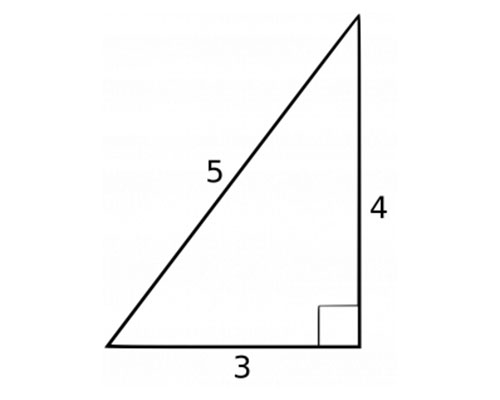

In [6]:
from IPython.display import Image, display, Audio, Markdown
import base64

IMAGE_PATH = "/content/triangle.jpg"

# Preview image for context
display(Image(IMAGE_PATH))

## Base64 Image Processing

In [7]:
# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8") #

base64_image = encode_image(IMAGE_PATH)

# base64.b64encode(image_file.read()): Dosyanın binary verilerini Base64 formatında encode eder. Bu, verileri Base64 string'ine dönüştürür.
# decode("utf-8"): Base64 ile encode edilmiş byte dizisini UTF-8 karakter dizisine (string) dönüştürür. Bu, Base64 string'ini Python string'i olarak elde etmemizi sağlar.

In [8]:
from IPython.display import Markdown

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/jpg;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

To find the area of a right triangle, you can use the formula:

\[ \text{Area} = \frac{1}{2} \times \text{base} \times \text{height} \]

In this triangle, the base is 3 units and the height is 4 units. Plugging these values into the formula gives:

\[ \text{Area} = \frac{1}{2} \times 3 \times 4 = \frac{1}{2} \times 12 = 6 \]

So, the area of the triangle is 6 square units.


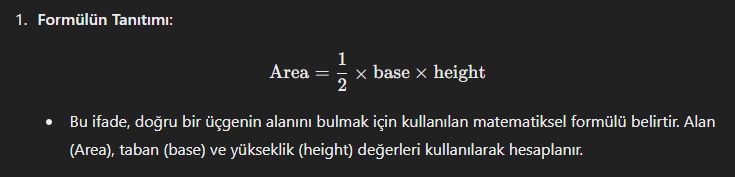

## URL Image Processing

In [9]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": "https://www.voovers.com/wp-content/uploads/images/3-4-5-triangle/lesson-images/345-triangle-ratio.jpg"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

To find the area of a right triangle, you can use the formula:

\[ \text{Area} = \frac{1}{2} \times \text{base} \times \text{height} \]

In this triangle, the base is 3 units and the height is 4 units. Plugging these values into the formula gives:

\[ \text{Area} = \frac{1}{2} \times 3 \times 4 = \frac{1}{2} \times 12 = 6 \]

So, the area of the triangle is 6 square units.


## Video Processing

In [10]:
!apt-get install ffmpeg
# ffmpeg paketini kurar. ffmpeg, video ve ses dosyalarını işlemek için kullanılan bir yazılımdır.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [11]:
!pip install opencv-python --quiet
!pip install moviepy --quiet

# opencv-python paketini kurar. OpenCV, görüntü işleme ve bilgisayarla görme uygulamaları için kullanılan bir kütüphanedir.
# moviepy paketini kurar. MoviePy, video düzenleme, işleme ve kompozisyon oluşturma için kullanılan bir Python kütüphanesidir.

In [12]:
!pip install -U pytube
# pytube paketini kurar. pytube, YouTube videolarını indirmenizi sağlayan bir Python kütüphanesidir.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.3 MB/s eta 0:00:00


In [14]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [ ]:
#from pytube import YouTube

# YouTube videosunun URL'si
#video_url = "https://www.youtube.com/shorts/fi6MbCiQLjA?feature=share"

#output_path = "/content"  # Dosyanın kaydedileceği dizin
#filename = "desired_filename"  # Dosyanın adı (uzantı olmadan)

# YouTube videosunu indir
#yt = YouTube(video_url)
#yt.streams.first().download(output_path=output_path, filename=filename)

In [15]:
import yt_dlp

# İndirilecek YouTube videosunun URL'si
url = 'https://www.youtube.com/shorts/fi6MbCiQLjA?feature=share'

# İndirme seçenekleri
ydl_opts = {
    'format': 'best', #worst,
    'outtmpl': '/content/desired_filename',
}

# Video indirme
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([url])

print("video downloaded successfully!")

#'best': En yüksek kalitedeki videoyu indirir.
#'worst': En düşük kalitedeki videoyu indirir.
#'bestvideo': En yüksek kalitedeki videoyu indirir (sadece video dosyası).
#'bestaudio': En yüksek kalitedeki sesi indirir.
#'mp4': Videoyu MP4 formatında indirir.
#'webm': Videoyu WebM formatında indirir.
#'ogg': Videoyu OGG formatında indirir.

[youtube] Extracting URL: https://www.youtube.com/shorts/fi6MbCiQLjA?feature=share
[youtube] fi6MbCiQLjA: Downloading webpage
[youtube] fi6MbCiQLjA: Downloading ios player API JSON
[youtube] fi6MbCiQLjA: Downloading player 8d9f6215
[youtube] fi6MbCiQLjA: Downloading m3u8 information
[info] fi6MbCiQLjA: Downloading 1 format(s): 18
[download] Destination: /content/desired_filename
[download] 100% of  956.93KiB in 00:00:00 at 8.42MiB/s   
video downloaded successfully!


In [ ]:
# rename video.mp4

In [16]:
import cv2 # cv2: OpenCV kütüphanesi, video işleme ve kare çıkarma için kullanılır.
from moviepy.editor import VideoFileClip #video dosyaları üzerinde işlem yapmak için kullanılır.
import time
import base64

VIDEO_PATH="/content/desired_filename"

In [17]:
# Bu kod bloğu, bir video dosyasından karelerin çıkarılması ve bu karelerin base64 formatında kodlanması işlemini gerçekleştiriyor.
# Ayrıca, videodan sesin çıkarılması ve bu sesin MP3 formatında kaydedilmesini sağlıyor.

def process_video(video_path, seconds_per_frame=2): #seconds_per_frame parametresi, her saniyede kaç kare çıkarılacağını belirler
    base64Frames = []
    base_video_path, _ = os.path.splitext(video_path)

    #cv2.VideoCapture ile video dosyası açılır ve karelerin sayısı ve fps (kare hızı) bilgileri alınır.
    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS)
    frames_to_skip = int(fps * seconds_per_frame)
    curr_frame=0

    # Loop through the video and extract frames at specified sampling rate
    while curr_frame < total_frames - 1:
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
        success, frame = video.read()
        if not success:
            break
        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
        curr_frame += frames_to_skip
    video.release()

    # Extract audio from video
    audio_path = f"{base_video_path}.mp3"
    clip = VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_path, bitrate="32k")
    clip.audio.close()
    clip.close()

    print(f"Extracted {len(base64Frames)} frames")
    print(f"Extracted audio to {audio_path}")
    return base64Frames, audio_path

# Extract 1 frame per second. You can adjust the `seconds_per_frame` parameter to change the sampling rate
base64Frames, audio_path = process_video(VIDEO_PATH, seconds_per_frame=1)

MoviePy - Writing audio in /content/desired_filename.mp3


MoviePy - Done.
Extracted 14 frames
Extracted audio to /content/desired_filename.mp3


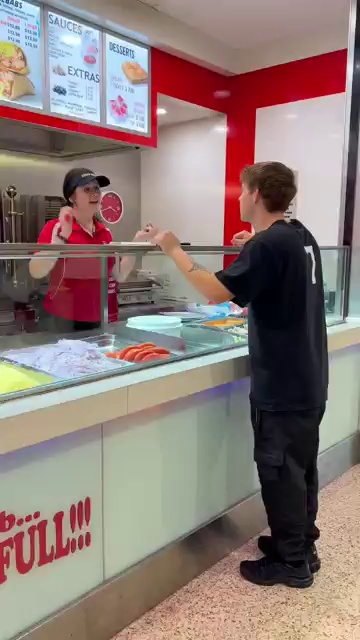

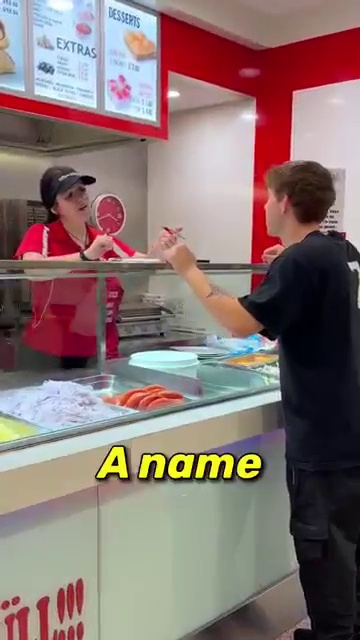

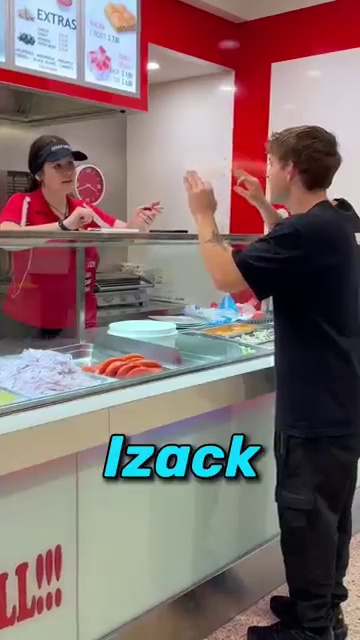

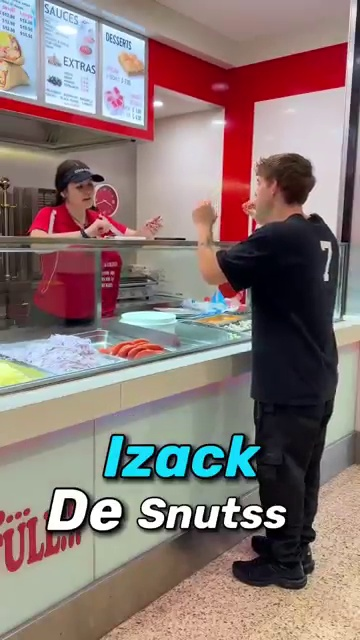

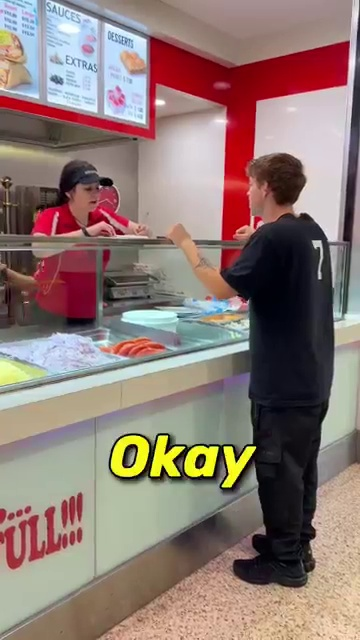

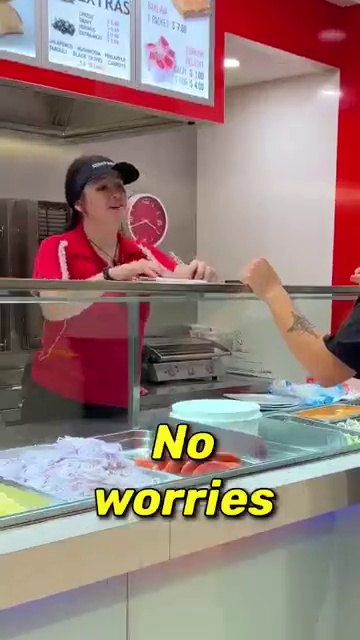

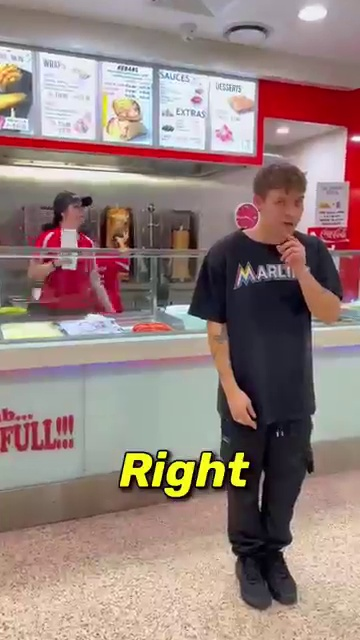

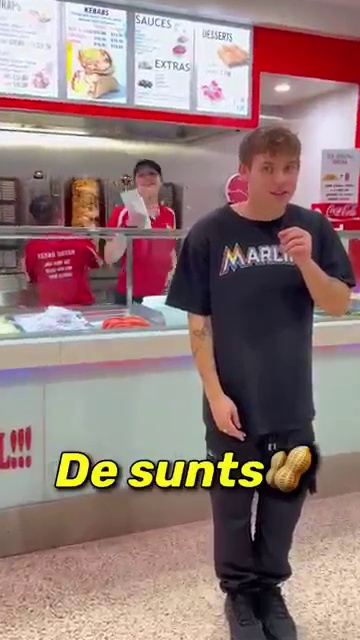

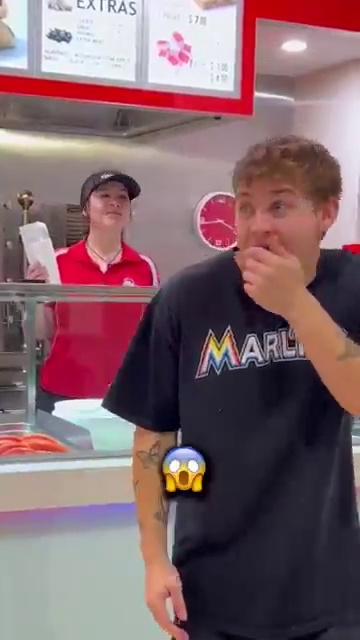

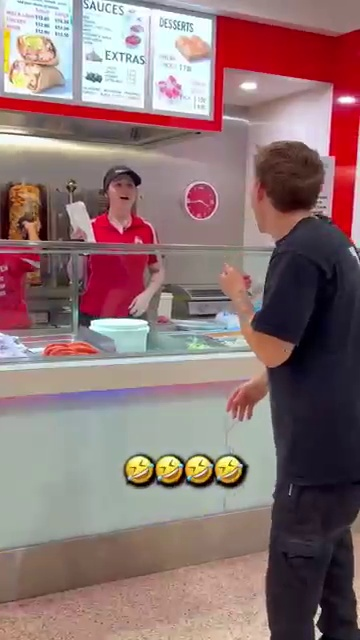

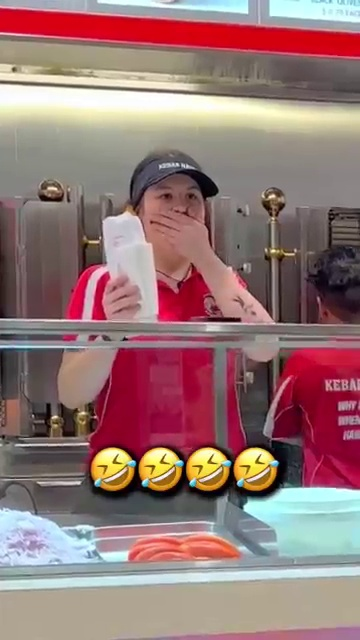

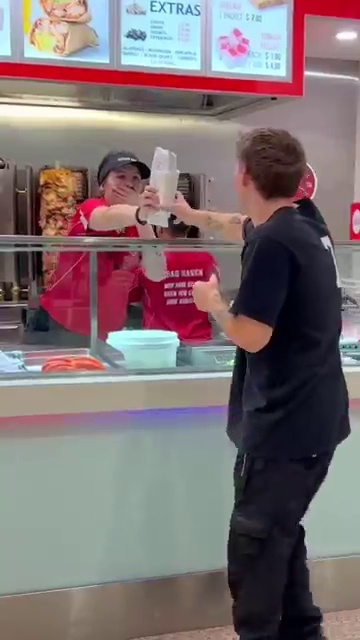

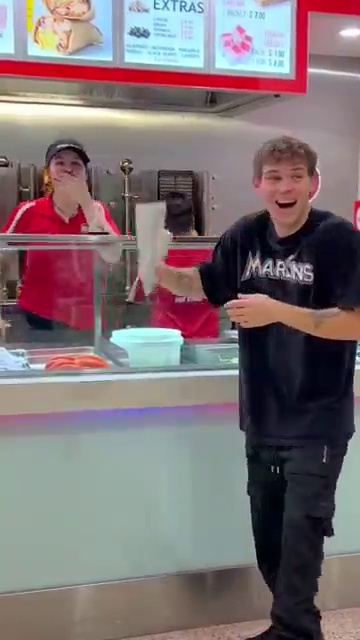

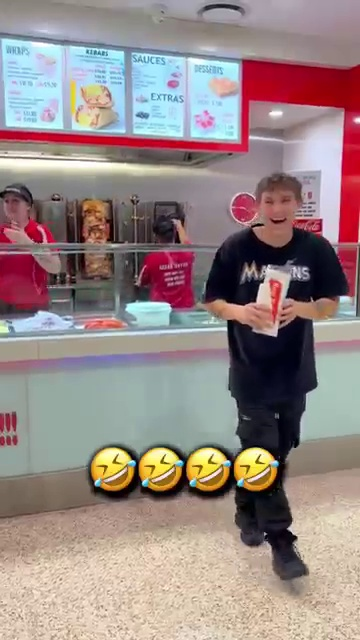

In [18]:
from IPython.display import Audio
import base64
from PIL import Image
import io

for img in base64Frames:
    image_data = base64.b64decode(img)
    image = Image.open(io.BytesIO(image_data))
    display(image)


Audio(audio_path)

## Video Summary

In [19]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": "You are generating a video summary. Please provide a summary of the video. Respond in Markdown."},
    {"role": "user", "content": [
        {"type": "text",
         "text":"These are the frames from the video."},

        *map(lambda x: {"type": "image_url",
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames)
        ],
    }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

### Video Summary

The video appears to be a humorous interaction at a food counter. Here’s a breakdown of the frames:

1. **Frame 1-2**: A customer is at the counter, talking to the staff member.
2. **Frame 3-4**: The customer provides a name, "Izack De Snutss," for the order.
3. **Frame 5-6**: The staff member acknowledges the name and says, "No worries."
4. **Frame 7-8**: The customer steps away from the counter, repeating the name "De sunts" with a peanut emoji, indicating a play on words.
5. **Frame 9-10**: The customer realizes the humorous nature of the name and reacts with surprise.
6. **Frame 11-12**: Both the customer and the staff member laugh at the joke.
7. **Frame 13-14**: The staff member hands over the order, and the customer continues to laugh as he walks away.

The video captures a light-hearted moment where a playful name leads to shared laughter between the customer and the staff.


## Audio Summary

The audio summary is generated by sending the model the audio transcript. With just the audio, the model is likely to bias towards the audio content, and will miss the context provided by the presentations and visuals.

{audio} input for GPT-4o isn't currently available but will be coming soon! For now, we use our existing whisper-1 model to process the audio

In [20]:
transcription = client.audio.transcriptions.create(
    model="whisper-1",
    file=open(audio_path, "rb"),
)
#print(transcription.text)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""You are generating a transcript summary. Create a summary of the provided transcription. Respond in Markdown."""},
    {"role": "user", "content": [
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
    }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

A customer places an order and gives the name "Isaac Deez Nuts." The staff member confirms the name and later calls out the order, humorously emphasizing the name "Deez Nuts" with repeated "BOOM!" sounds.


In [21]:
transcription.text

"Right, can I just get a name for that order? It's Isaac Deez Nuts. Okay, alright, no worries, I'll call that one out, it's ready. Right, order for Isaac on Deez Nuts. BOOM! BOOM! BOOM! BOOM! BOOM! BOOM! BOOM! "

## Audio + Visual Summary

The Audio + Visual summary is generated by sending the model both the visual and the audio from the video at once. When sending both of these, the model is expected to better summarize since it can perceive the entire video at once.

In [22]:
## Generate a summary with visual and audio
from IPython.display import Markdown

response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""You are generating a video summary. Create a summary of the provided video and its transcript. Respond in Markdown"""},
    {"role": "user", "content": [
        {"type": "text",
         "text":"These are the frames from the video."},
        *map(lambda x: {"type": "image_url",
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
    }
],
    temperature=0,
)
Markdown(response.choices[0].message.content)

# Each element of the base64Frames list is sent to the lambda function.
# The lambda function creates a dictionary of type image_url using this element.
# The map function creates a new list containing the dictionaries created for each base64Frames element.

### Video Summary

In the video, a humorous interaction takes place at a food counter between a customer and a staff member. Here’s a breakdown of the events:

1. **Order Placement**: The customer approaches the counter to place an order. The staff member asks for a name to associate with the order.
2. **Name Given**: The customer mischievously gives the name "Isaac Deez Nuts."
3. **Confirmation**: The staff member confirms the name and proceeds with the order.
4. **Order Ready**: When the order is ready, the staff member calls out the name "Isaac on Deez Nuts," which causes both the customer and the staff member to burst into laughter.
5. **Reaction**: The customer and the staff member share a moment of amusement, with the customer visibly pleased with the prank and the staff member laughing heartily.
6. **Conclusion**: The customer collects the order, and both parties continue to laugh, enjoying the light-hearted moment.

The video captures a playful and funny exchange, highlighting a common prank involving the phrase "Deez Nuts."

## Question and Answering
For the Q&A, we'll use the same concept as before to ask questions of our processed video while running the same 3 tests to demonstrate the benefit of combining input modalities:

- Visual Q&A
- Audio Q&A
- Visual + Audio Q&A

### Visual Q&A

In [23]:
QUESTION = "what's funny in the video?"

qa_visual_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": "Use the video to answer the provided question. Respond in Markdown."},
    {"role": "user", "content": [
        {"type": "text",
         "text":"These are the frames from the video."},
        *map(lambda x: {"type": "image_url", "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        {"type": "text",
         "text":QUESTION}
        ],
    }
    ],
    temperature=0,
)
Markdown("Visual QA:\n" + qa_visual_response.choices[0].message.content)

Visual QA:
In the video, the humor arises from a playful interaction between the customer and the server. The customer gives a humorous and suggestive fake name, "Izack De Snutss," which sounds like "I suck these nuts" when spoken aloud. The server, initially unaware of the joke, repeats the name back to the customer. Once the customer steps away and says the name out loud again, the server realizes the joke and starts laughing, leading to a shared moment of amusement between them. The customer's reaction and the server's delayed realization contribute to the comedic effect.

In [24]:
QUESTION = "what's funny in the video?"

qa_visual_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": "Use the video to answer the provided question. Respond in Markdown."},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        QUESTION
        ],
    }
    ],
    temperature=0,
)
Markdown("Visual QA:\n" + qa_visual_response.choices[0].message.content)

Visual QA:
In the video, the humor arises from a playful interaction between the customer and the server. The customer gives a humorous and suggestive fake name, "Izack De Snutss," which sounds like "I suck these nuts" when spoken aloud. The server, initially unaware of the joke, repeats the name back to the customer. Once the customer steps away and says the name out loud again, the server realizes the joke and starts laughing, leading to a shared moment of amusement between them. The exaggerated reactions and the realization of the joke contribute to the comedic effect.

### Audio Q&A

In [25]:
qa_audio_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""Use the transcription to answer the provided question. Respond in Markdown."""},
    {"role": "user", "content": f"The audio transcription is: {transcription.text}. \n\n {QUESTION}"},
    ],
    temperature=0,
)
Markdown("Audio QA:\n" + qa_audio_response.choices[0].message.content)

Audio QA:
The humor in the video comes from a play on words and a prank. The name given for the order, "Isaac Deez Nuts," is a setup for a joke. When the person calls out the order, it sounds like "I suck Deez Nuts," which is a crude joke meant to catch the person calling out the order off guard and create a humorous situation. The repeated "BOOM!" at the end emphasizes the punchline and adds to the comedic effect.

In [26]:
qa_audio_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""Use the transcription to answer the provided question. Respond in Markdown."""},
    {"role": "user", "content": f"The audio transcription is: {transcription.text}" +"\n\n" +QUESTION},
    ],
    temperature=0,
)
Markdown("Audio QA:\n" + qa_audio_response.choices[0].message.content)

Audio QA:
The humor in the video comes from a play on words and a prank. The name given for the order, "Isaac Deez Nuts," is a setup for a joke. When the person calls out the order, it sounds like "I suck Deez Nuts," which is a crude and humorous phrase. The repeated "BOOM!" at the end emphasizes the punchline and adds to the comedic effect.

### Visual + Audio Q&A

In [27]:
qa_both_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""Use the video and transcription to answer the provided question."""},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url",
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"},
        QUESTION
        ],
    }
    ],
    temperature=0,
)
Markdown("Both QA:\n" + qa_both_response.choices[0].message.content)

Both QA:
The humor in the video stems from a play on words and a prank. The customer gives a fake name, "Isaac Deez Nuts," for his order. When the employee calls out the name, it sounds like "I suck Deez Nuts," which is a crude joke. The realization of the prank leads to laughter from both the customer and the employee, making the situation humorous. The exaggerated reactions and the use of emojis in the video further emphasize the comedic effect.